# Exercises

### CountVectorizer

In [ ]:
# from sklearn.datasets import load_files
# imdb_train = load_files('data/aclimdb/train')
# X_train,y_train = imdb_train.data[:10000], imdb_train.target[:10000]
# len(X_train)

In [ ]:
# imdb_test = load_files('data/aclimdb/test')
# X_test,y_test = imdb_test.data[:2500], imdb_test.target[:2500]
# len(X_test)

In [1]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, 
                             random_state=1,
                             remove=('headers', 'footers', 'quotes'))
X,y = dataset.data[:10000], dataset.target[:10000]

In [2]:
X[0]

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [55]:
y[:10]

array([17,  0, 17, 11, 10, 15,  4, 17, 13, 12])

In [56]:
dataset['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify = y)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1000)
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [11]:
# cv.get_feature_names()

In [34]:
X_train_cv.shape, y_train.shape

((7000, 1000), (7000,))

### Train with transformed data

In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_cv, y_train)

### Cross Validation

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(max_depth = 5)
scores = cross_val_score(clf, X_train_cv, y_train, cv=5)
scores

array([0.15860597, 0.15954416, 0.14510365, 0.1525788 , 0.13620072])

In [35]:
scores.mean(), scores.std()

(0.15040665856162677, 0.008779198321210104)

### Pipeline

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline([('vectorizer', CountVectorizer(max_features = 10000)),
                  ('tree', DecisionTreeClassifier(max_depth = 100,
                                                       min_samples_split = 15))
                ])
pipe.fit(X_train, y_train)   
pipe.score(X_test, y_test)

0.431

### CV Search on Pipelines

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline([('vectorizer', CountVectorizer()),
                  ('tree', DecisionTreeClassifier())
                ])

In [43]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'vectorizer__max_features': range(5000,20000),
              'tree__max_depth': range(50, 200), 
              'tree__min_samples_split':range(5,20)}

searcher = RandomizedSearchCV(pipe, param_grid, cv=2)
searcher.fit(X_train,y_train)

RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('vectorizer',
                                              CountVectorizer(analyzer='word',
                                                              binary=False,
                                                              decode_error='strict',
                                                              dtype=<class 'numpy.int64'>,
                                                              encoding='utf-8',
                                                              input='content',
                                                              lowercase=True,
                                                              max_df=1.0,
                                                              max_features=None,
                                                              min_df=1,
                                    

In [44]:
searcher.best_params_

{'vectorizer__max_features': 7262,
 'tree__min_samples_split': 18,
 'tree__max_depth': 194}

In [45]:
searcher.best_score_

0.40185714285714286

In [47]:
searcher.score(X_test, y_test)

0.439

### RandomizedSearchCV on Pipe with Ensemble method

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline([('vectorizer', TfidfVectorizer()),
                  ('classifier', GradientBoostingClassifier())
                ])

from sklearn.model_selection import RandomizedSearchCV
param_grid = {'vectorizer__max_features': range(5000,20000),
              'classifier__n_estimators': range(10, 50)
             }

In [51]:
searcher = RandomizedSearchCV(pipe, 
                              param_grid, 
                              cv=2, 
                              n_iter=3)
searcher.fit(X_train,y_train)

In [ ]:
searcher.best_params_

In [ ]:
searcher.best_score_

In [ ]:
searcher.score(X_test, y_test)

# Archive

## Ex: Cross Validation (Optional)

In [22]:
import pandas as pd
credit = pd.read_csv('data/credit.csv')

In [19]:
# credit.head()

In [24]:
y = credit['Creditability']
X = credit.drop(columns = ['Creditability'])

In [25]:
y.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=2019,
                                                    stratify = y)

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

/Users/anqitu/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
clf.score(X_test,y_test)

0.7366666666666667

In [36]:
y_pred = clf.predict(X_test)

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [38]:
precision_score(y_test, y_pred)

0.7630522088353414

In [39]:
recall_score(y_test, y_pred)

0.9047619047619048

In [40]:
f1_score(y_test, y_pred)

0.8278867102396514

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.37      0.49       126
           1       0.76      0.94      0.84       274

    accuracy                           0.76       400
   macro avg       0.75      0.65      0.66       400
weighted avg       0.75      0.76      0.73       400



In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 46,  80],
       [ 17, 257]])

In [68]:
y_prob = clf.predict_proba(X_test)

In [69]:
y_prob[:10]

array([[0.22799216, 0.77200784],
       [0.05388898, 0.94611102],
       [0.77158966, 0.22841034],
       [0.22876596, 0.77123404],
       [0.07463108, 0.92536892],
       [0.11562656, 0.88437344],
       [0.37440123, 0.62559877],
       [0.18500927, 0.81499073],
       [0.04502142, 0.95497858],
       [0.38659174, 0.61340826]])

In [70]:
from sklearn.metrics import roc_curve, auc
roc_curve(y_test,y_prob[:, 1])

(array([0.        , 0.        , 0.        , 0.02409639, 0.02409639,
        0.03614458, 0.03614458, 0.06024096, 0.06024096, 0.07228916,
        0.07228916, 0.08433735, 0.08433735, 0.09638554, 0.09638554,
        0.10843373, 0.10843373, 0.12048193, 0.12048193, 0.13253012,
        0.13253012, 0.14457831, 0.14457831, 0.15662651, 0.15662651,
        0.1686747 , 0.1686747 , 0.19277108, 0.19277108, 0.21686747,
        0.21686747, 0.22891566, 0.22891566, 0.26506024, 0.26506024,
        0.27710843, 0.27710843, 0.30120482, 0.30120482, 0.31325301,
        0.31325301, 0.3373494 , 0.3373494 , 0.34939759, 0.34939759,
        0.37349398, 0.37349398, 0.38554217, 0.38554217, 0.39759036,
        0.39759036, 0.43373494, 0.43373494, 0.44578313, 0.44578313,
        0.45783133, 0.45783133, 0.46987952, 0.46987952, 0.51807229,
        0.51807229, 0.54216867, 0.54216867, 0.55421687, 0.55421687,
        0.56626506, 0.56626506, 0.60240964, 0.60240964, 0.61445783,
        0.61445783, 0.62650602, 0.62650602, 0.63

In [41]:
fpr, tpr, thresholds = roc_curve(y_test,y_prob[:, 1])

In [52]:
pd.DataFrame(data = {'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})

,fpr,tpr,thresholds
0,0.000000,0.000000,1.989689
1,0.000000,0.003650,0.989689
2,0.000000,0.072993,0.959399
3,0.007937,0.072993,0.959370
4,0.007937,0.135036,0.946308
...,...,...,...
127,0.960317,0.989051,0.229549
128,0.960317,0.996350,0.216627
129,0.984127,0.996350,0.182465
130,0.984127,1.000000,0.165916


In [53]:
%matplotlib inline

Text(0, 0.5, 'True Postiie Rate')

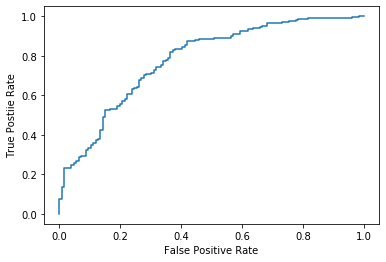

In [115]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Postiie Rate')

In [120]:
def plot_roc_curve(y_true, y_prob, title = None, save_directory = None, show = True):
    PLOT_HEIGHT = 12
    fig = plt.figure(facecolor='w', figsize=(PLOT_HEIGHT, PLOT_HEIGHT * 1.1))

    fpr, tpr, threshold = roc_curve(y_true, y_prob)
    roc_auc = roc_auc_score(y_true, y_prob)

    plt.plot(fpr, tpr, 'c', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right', fontsize=16)
    plt.plot([0, 1], [0, 1],'k--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.tick_params(labelsize=16)

    if title is None:
        title = 'ROC Curve'
    plt.title(title, loc = 'center', y=1.1, fontsize = 20)
    plt.tight_layout()

    if save_directory:
        check_dir(save_directory)
        check_dir(os.path.join(save_directory, 'roc'))
        saved_path = os.path.join(save_directory, 'roc', convert_filename(title))
        fig.savefig(saved_path, dpi=200, bbox_inches="tight")
        print('Saved to {}'.format(saved_path))
    if show:
        plt.show()

    plt.close()

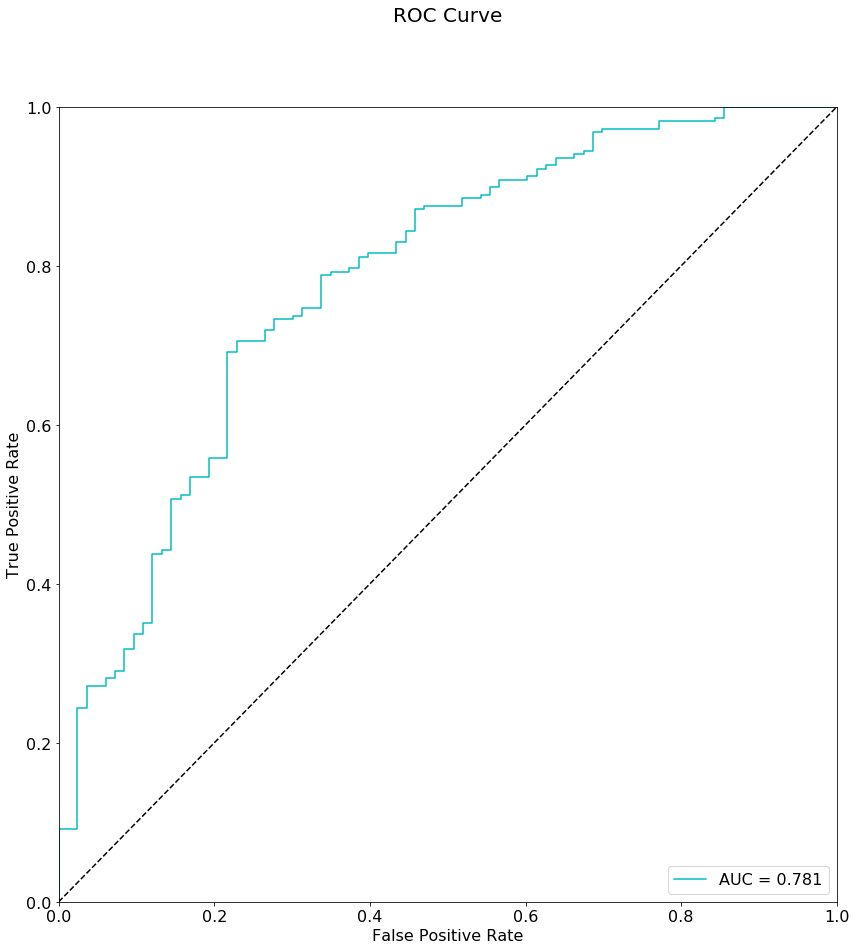

In [121]:
plot_roc_curve(y_test,y_prob[:, 1])

In [59]:
auc(fpr, tpr)

0.7792550110068359

In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob[:, 1])

0.7792550110068359

In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)

/Users/anqitu/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anqitu/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anqitu/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anqitu/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anqitu/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logisti

In [56]:
scores.mean(), scores.std()

(0.7449935180683843, 0.029648094590487534)

## Ex: Pipeline

In [66]:
import pandas as pd
credit = pd.read_csv('data/credit.csv')
y = credit['Creditability']
X = credit.drop(columns = ['Creditability'])

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0,
                                                    stratify = y)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', MinMaxScaler()),
                 ('clf', LogisticRegression())])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

/Users/anqitu/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.73

In [73]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X_train, y_train, cv=5)

/Users/anqitu/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anqitu/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anqitu/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anqitu/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anqitu/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logisti

In [75]:
scores.mean(), scores.std()

(0.7728571428571429, 0.0053452248382485044)

## Ex: GridSearchCV

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('scaler', MinMaxScaler()), 
                 ('tree', DecisionTreeClassifier())])

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {'tree__max_depth':range(2,8), 
              'tree__min_samples_split':range(2,10)}

clf = GridSearchCV(pipe, param_grid,cv=5)
clf.fit(X_train,y_train)

print(clf.best_params_)    
print(clf.best_score_)

{'tree__max_depth': 4, 'tree__min_samples_split': 2}
0.7485714285714286


In [78]:
clf.score(X_test,y_test)

0.6933333333333334

## Ex: RandomizedSearchCV

In [79]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'tree__max_depth':range(2,8), 
              'tree__min_samples_split':range(2,10)}
clf = RandomizedSearchCV(pipe,param_grid,cv=5).fit(X_train,y_train)

print(clf.best_params_)    
print(clf.best_score_)

{'tree__min_samples_split': 5, 'tree__max_depth': 4}
0.75


In [80]:
clf.score(X_test,y_test)

0.6933333333333334

## Ex: Ensemble Estimators

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier

pipe = Pipeline([('scaler', MinMaxScaler()), 
                 ('abc', AdaBoostClassifier())])

In [87]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
                'abc__n_estimators':range(10,100)
             }
clf = RandomizedSearchCV(pipe,param_grid,cv=5)
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('abc',
                                              AdaBoostClassifier(algorithm='SAMME.R',
                                                                 base_estimator=None,
                                                                 learning_rate=1.0,
                                                                 n_estimators=50,
                                                                 random_state=None))],
                                      verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   pa

In [89]:
print(clf.best_params_)    
print(clf.best_score_)

{'abc__n_estimators': 34}
0.76


In [90]:
clf.score(X_test,y_test)

0.7166666666666667